In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py as h5

for a given simulation there are 4 state variables rho, P, vel1, vel2

there are 9 different cooling time parameters ranging from 0.03 to 3.16 (log spaced)

for each cooling time there are 10 different initial random seeds for the noise

the data is arranged as (n_seeds, n_times, 384, 128)

the spatial axes are labeled 2, 1 and correspond to the 384, and 128 indexes. So vel2 is the velocity in the direction that is 384 long

In [2]:
file = h5.File('data/dens_data_tcool_0.03.h5', 'r')
dens = file['dens_data'][:]
file.close()

In [3]:
dens.shape

(10, 101, 384, 128)

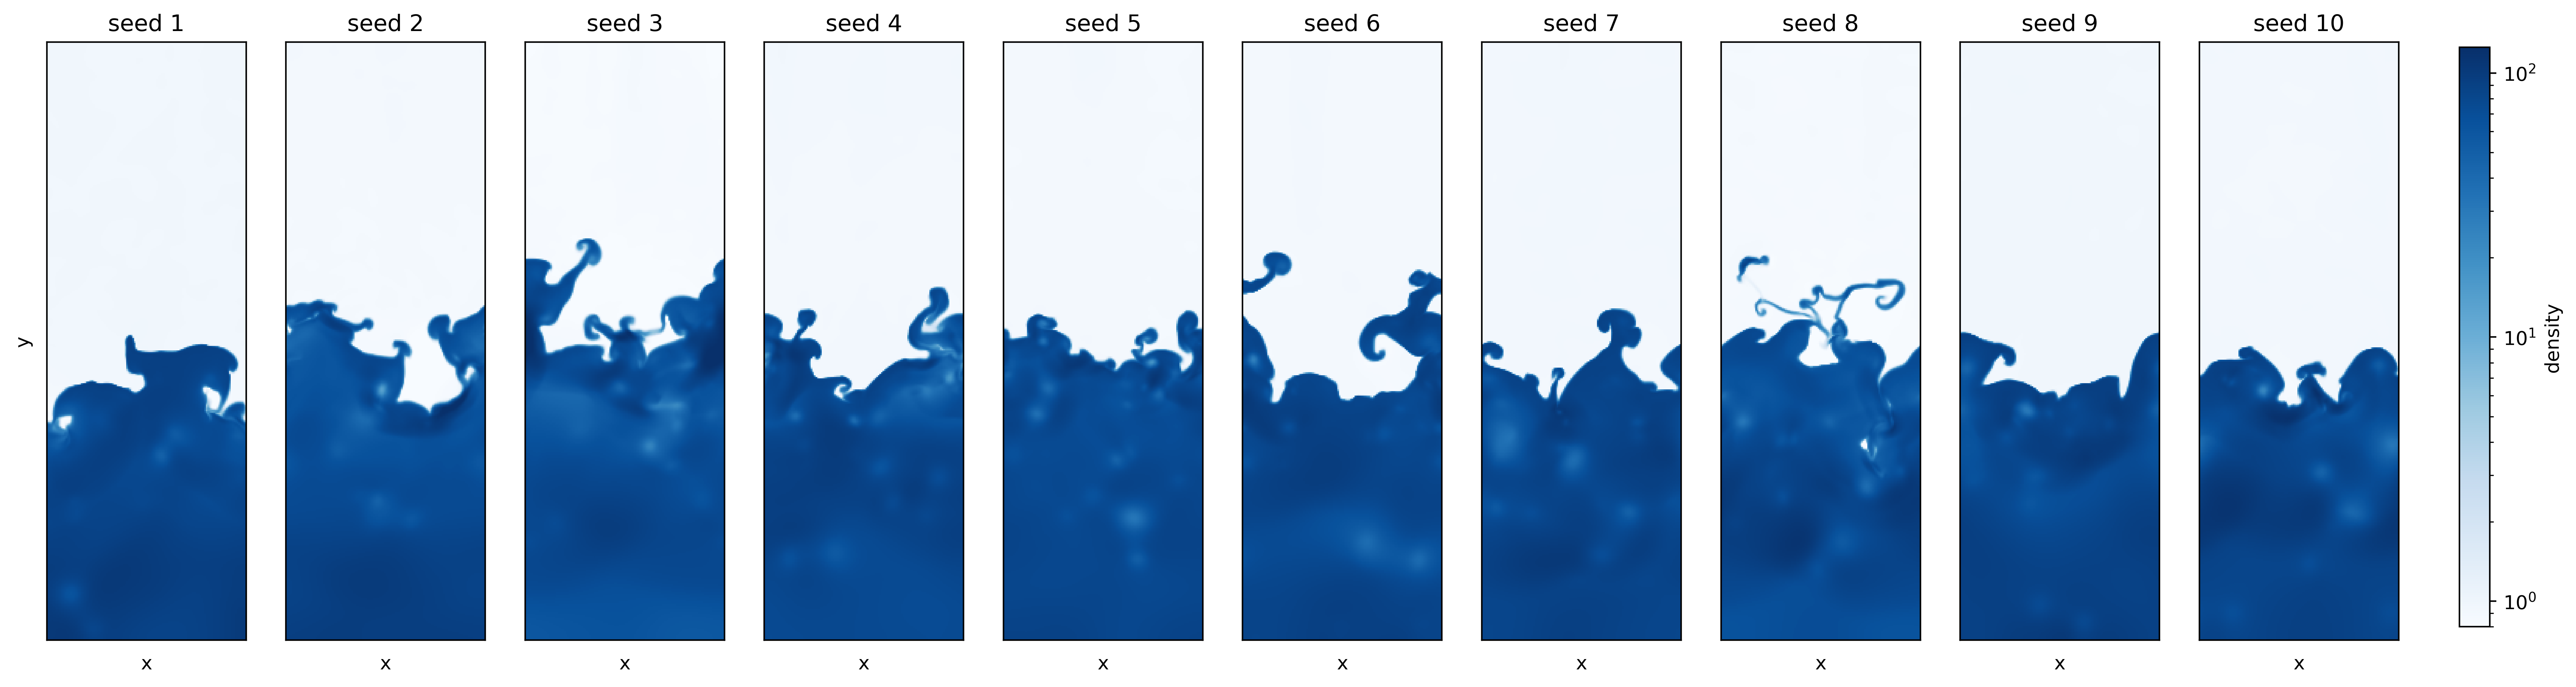

In [5]:
# plot 2D slices of the density field
fig, axs = plt.subplots(1, 10, dpi = 400, figsize = (22, 6))
for i in range(10):
    plot = axs[i].imshow(dens[i,-1], cmap = 'Blues', norm=LogNorm(vmin = 0.8, vmax=125), origin='lower')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('x')
    axs[i].set_title('seed %d' % (i+1))
axs[0].set_ylabel('y')

#add an axis on the right for a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cb = fig.colorbar(plot, cax=cbar_ax)
cb.set_label('density')


In [8]:
file = h5.File('data/press_data_tcool_0.03.h5', 'r')
press = file['press_data'][:]
file.close()

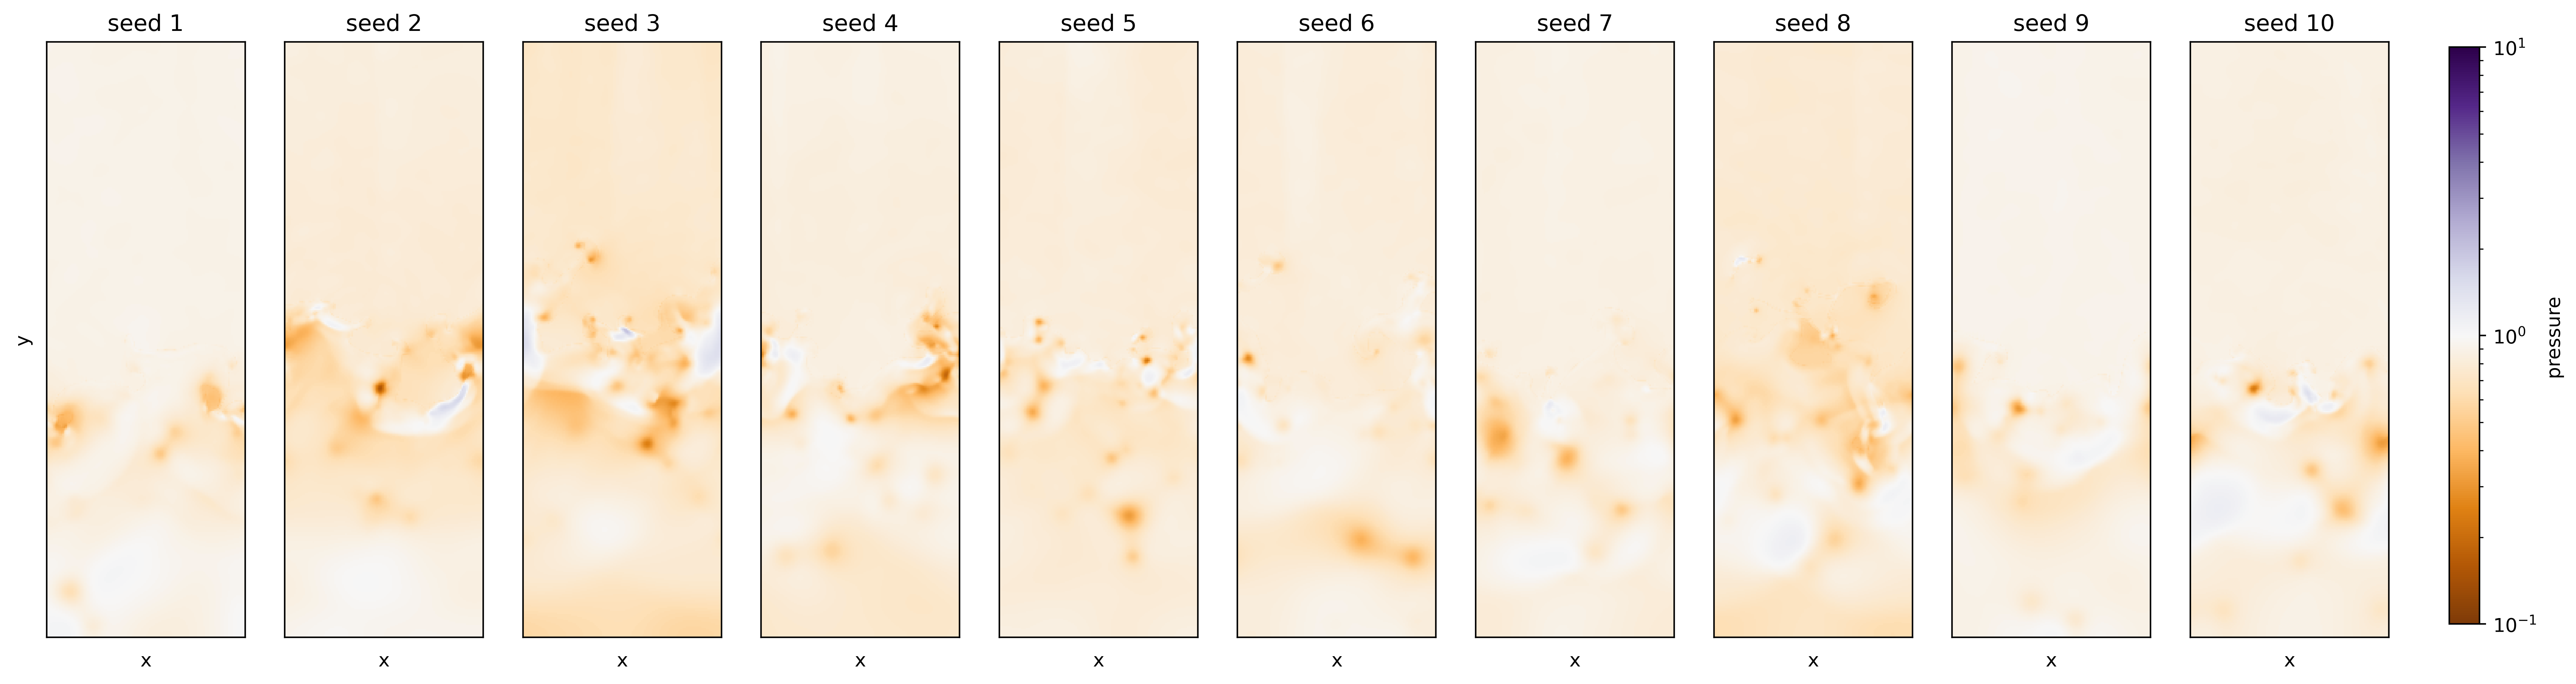

In [9]:
# plot 2D slices of the pressure field
fig, axs = plt.subplots(1, 10, dpi = 400, figsize = (22, 6))
for i in range(10):
    plot = axs[i].imshow(press[i,-1], cmap = 'PuOr', norm=LogNorm(vmin = 10**-1, vmax=10**1), origin='lower')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('x')
    axs[i].set_title('seed %d' % (i+1))
axs[0].set_ylabel('y')

#add an axis on the right for a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cb = fig.colorbar(plot, cax=cbar_ax)
cb.set_label('pressure')


In [10]:
file = h5.File('data/vel1_data_tcool_0.03.h5', 'r')
vel1 = file['vel1_data'][:]
file.close()

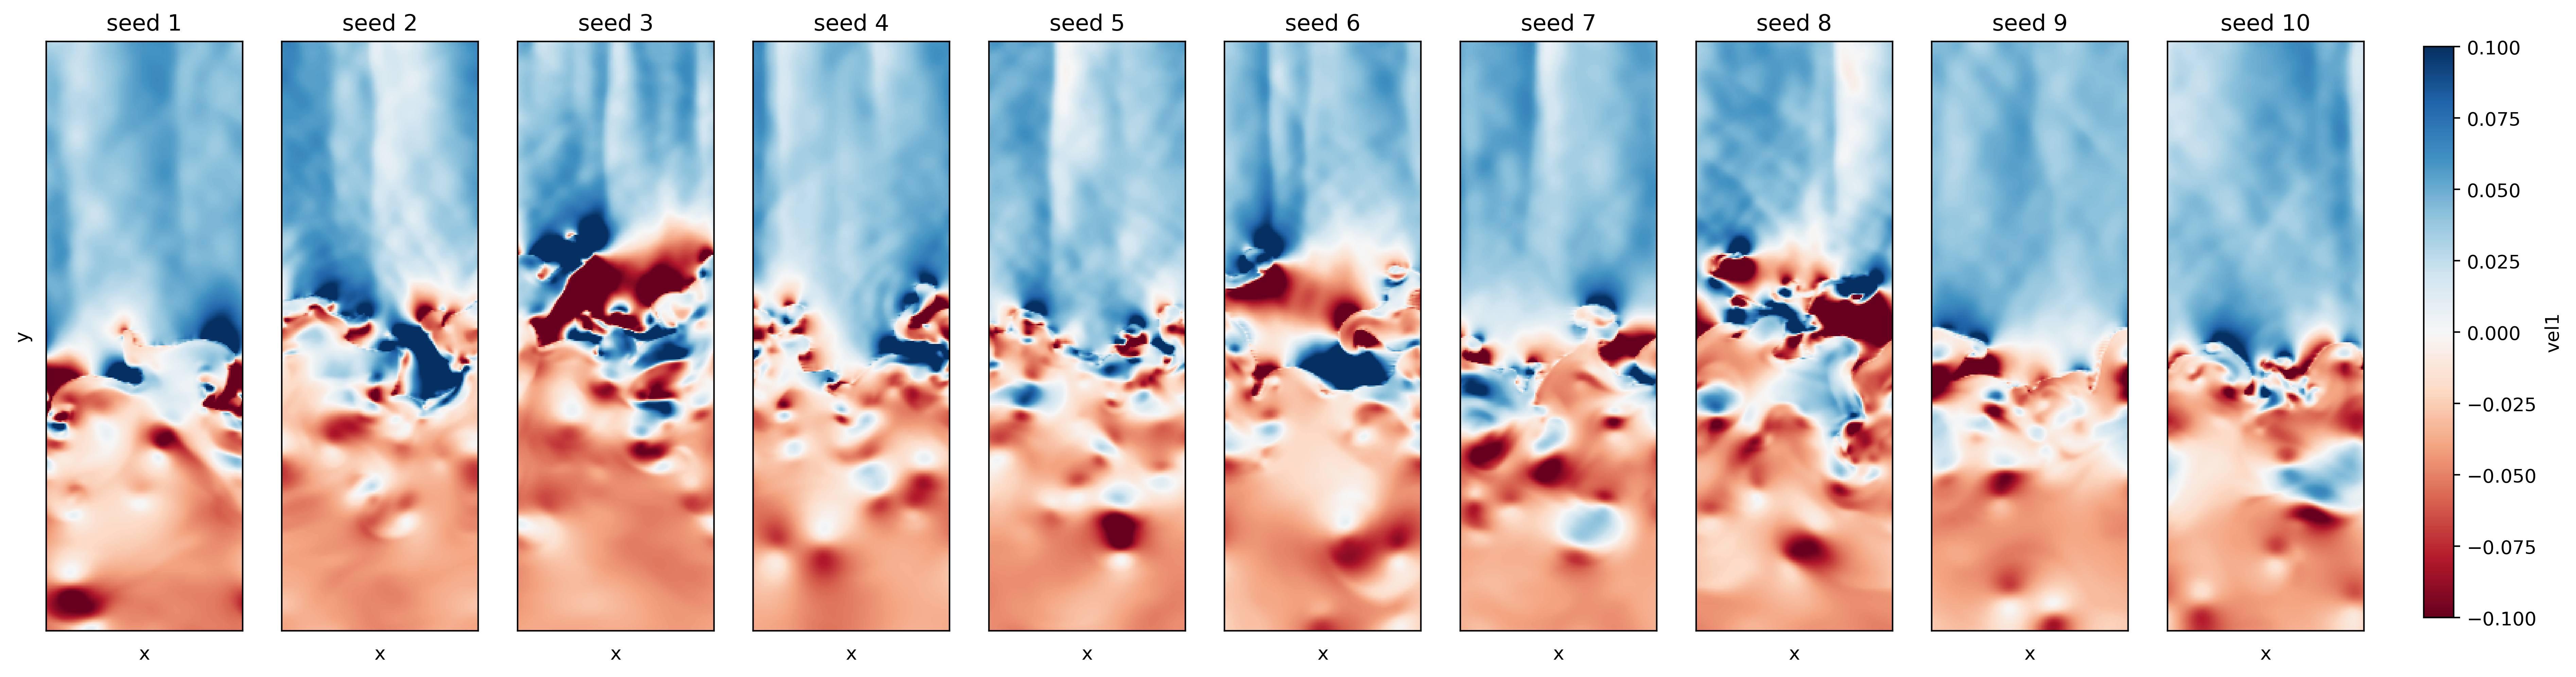

In [11]:
# plot 2D slices of the vel1 field
fig, axs = plt.subplots(1, 10, dpi = 400, figsize = (22, 6))
for i in range(10):
    plot = axs[i].imshow(vel1[i,-1], cmap = 'RdBu', vmin = -0.1, vmax=0.1, origin='lower')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('x')
    axs[i].set_title('seed %d' % (i+1))
axs[0].set_ylabel('y')

#add an axis on the right for a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cb = fig.colorbar(plot, cax=cbar_ax)
cb.set_label('vel1')


In [12]:
file = h5.File('data/vel2_data_tcool_0.03.h5', 'r')
vel2 = file['vel2_data'][:]
file.close()

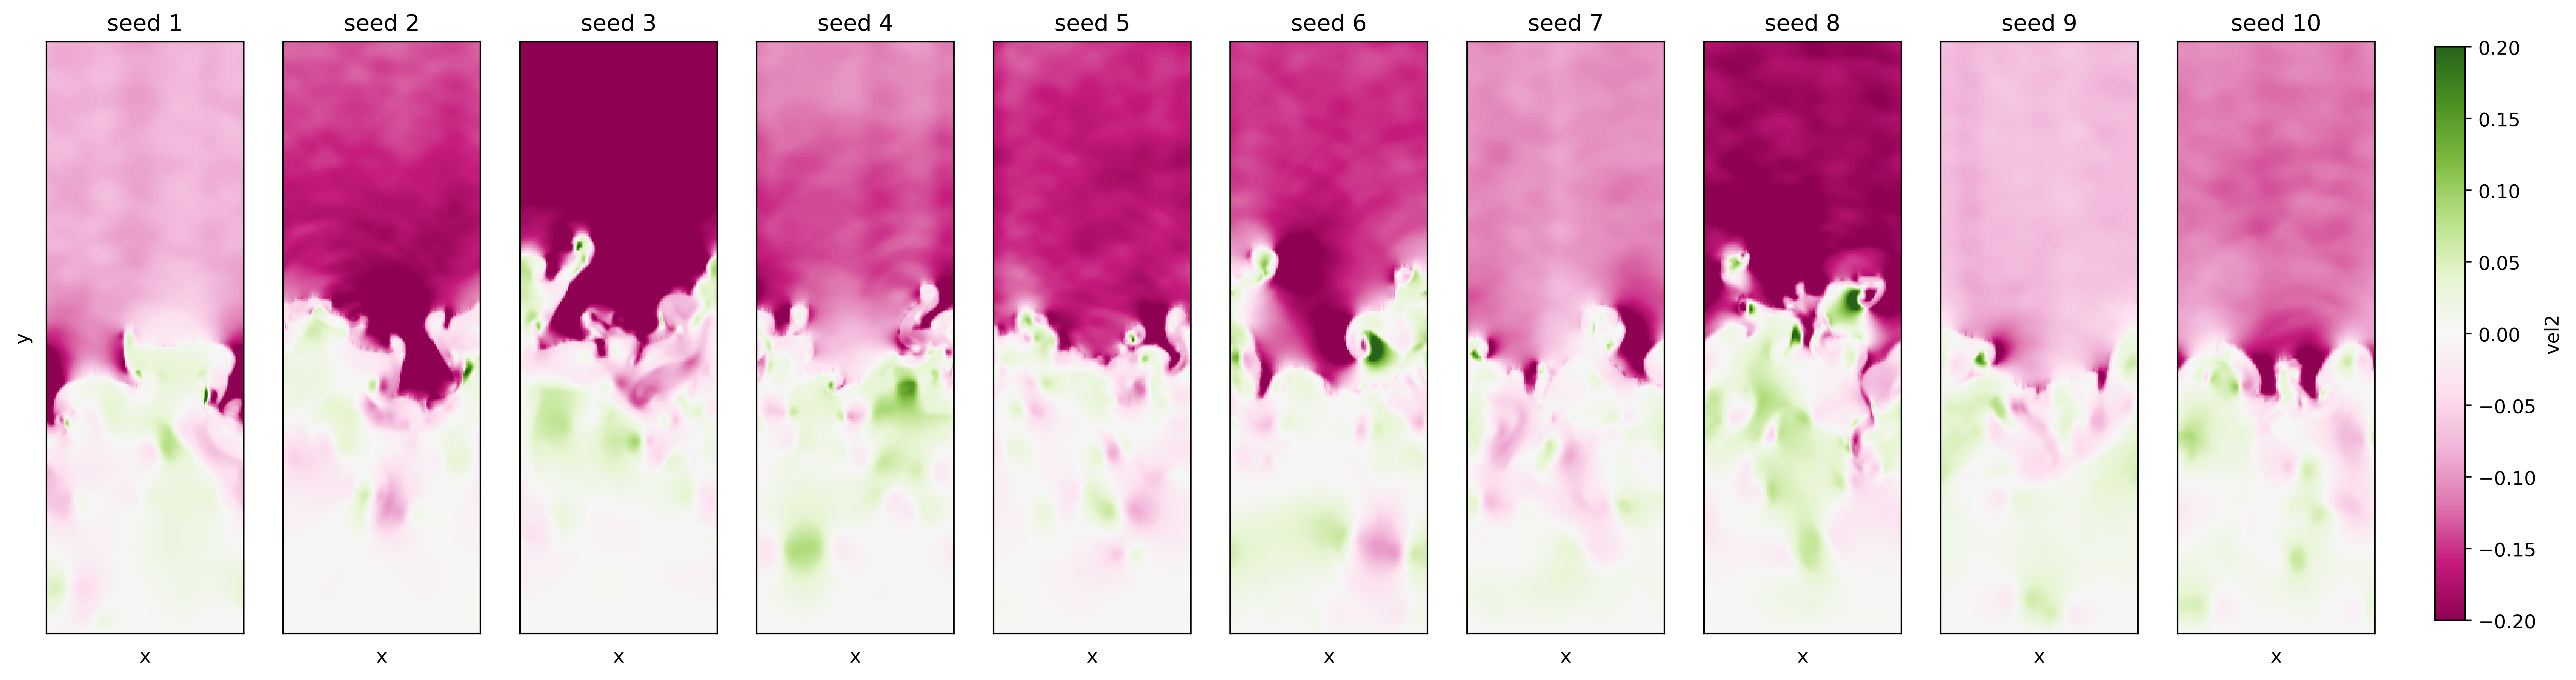

In [13]:
# plot 2D slices of the vel2 field
fig, axs = plt.subplots(1, 10, dpi = 400, figsize = (22, 6))
for i in range(10):
    plot = axs[i].imshow(vel2[i,-1], cmap = 'PiYG', vmin = -0.2, vmax=0.2, origin='lower')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('x')
    axs[i].set_title('seed %d' % (i+1))
axs[0].set_ylabel('y')

#add an axis on the right for a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cb = fig.colorbar(plot, cax=cbar_ax)
cb.set_label('vel2')


In [14]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tqdm import tqdm
def create_gif(time_series, saving_directory, name_file = 'concentration', delete_imgs=False):
    time_series_min = time_series.min()
    time_series_max = time_series.max()
    if time_series.ndim > 3:
        #error:
        print('Error: The time series should be (time, height, width)')
        return
    if not os.path.exists(saving_directory + '/img_for_gif'):
        os.makedirs(saving_directory + '/img_for_gif')
    images = []
    for i in range(time_series.shape[0]):
        plt.imshow(time_series[i], origin='lower', vmin=time_series_min, vmax=time_series_max);
        plt.axis('off')
        plt.savefig(saving_directory + f'/img_for_gif/time_series_{i}.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        images.append(imageio.imread(saving_directory + f'/img_for_gif/time_series_{i}.png'))

    imageio.mimsave(saving_directory + '/' + name_file + '.gif', images, duration=0.1)
    if delete_imgs:
        shutil.rmtree(saving_directory + '/img_for_gif')

In [15]:
create_gif(dens[0], 'gif_data', name_file = 'density', delete_imgs=True)
create_gif(press[0], 'gif_data', name_file = 'pressure', delete_imgs=True)
create_gif(vel1[0], 'gif_data', name_file = 'vel1', delete_imgs=True)
create_gif(vel2[0], 'gif_data', name_file = 'vel2', delete_imgs=True)


/tmp/ipykernel_3911477/2257557440.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(saving_directory + f'/img_for_gif/time_series_{i}.png'))
